# Biblioteki 

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns



# Załadowanie danych

In [5]:
df = pd.read_csv("nasa.csv")
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


# 1.Kontrola danych


In [6]:
print(df.shape)
df.head()

(4687, 40)


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [8]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


# 2. Sprawdzenie brakujących danych

In [11]:
# sprawdzenie
print(df.isnull().sum())



Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

# 3. Sprawdzenie korelacji cech 

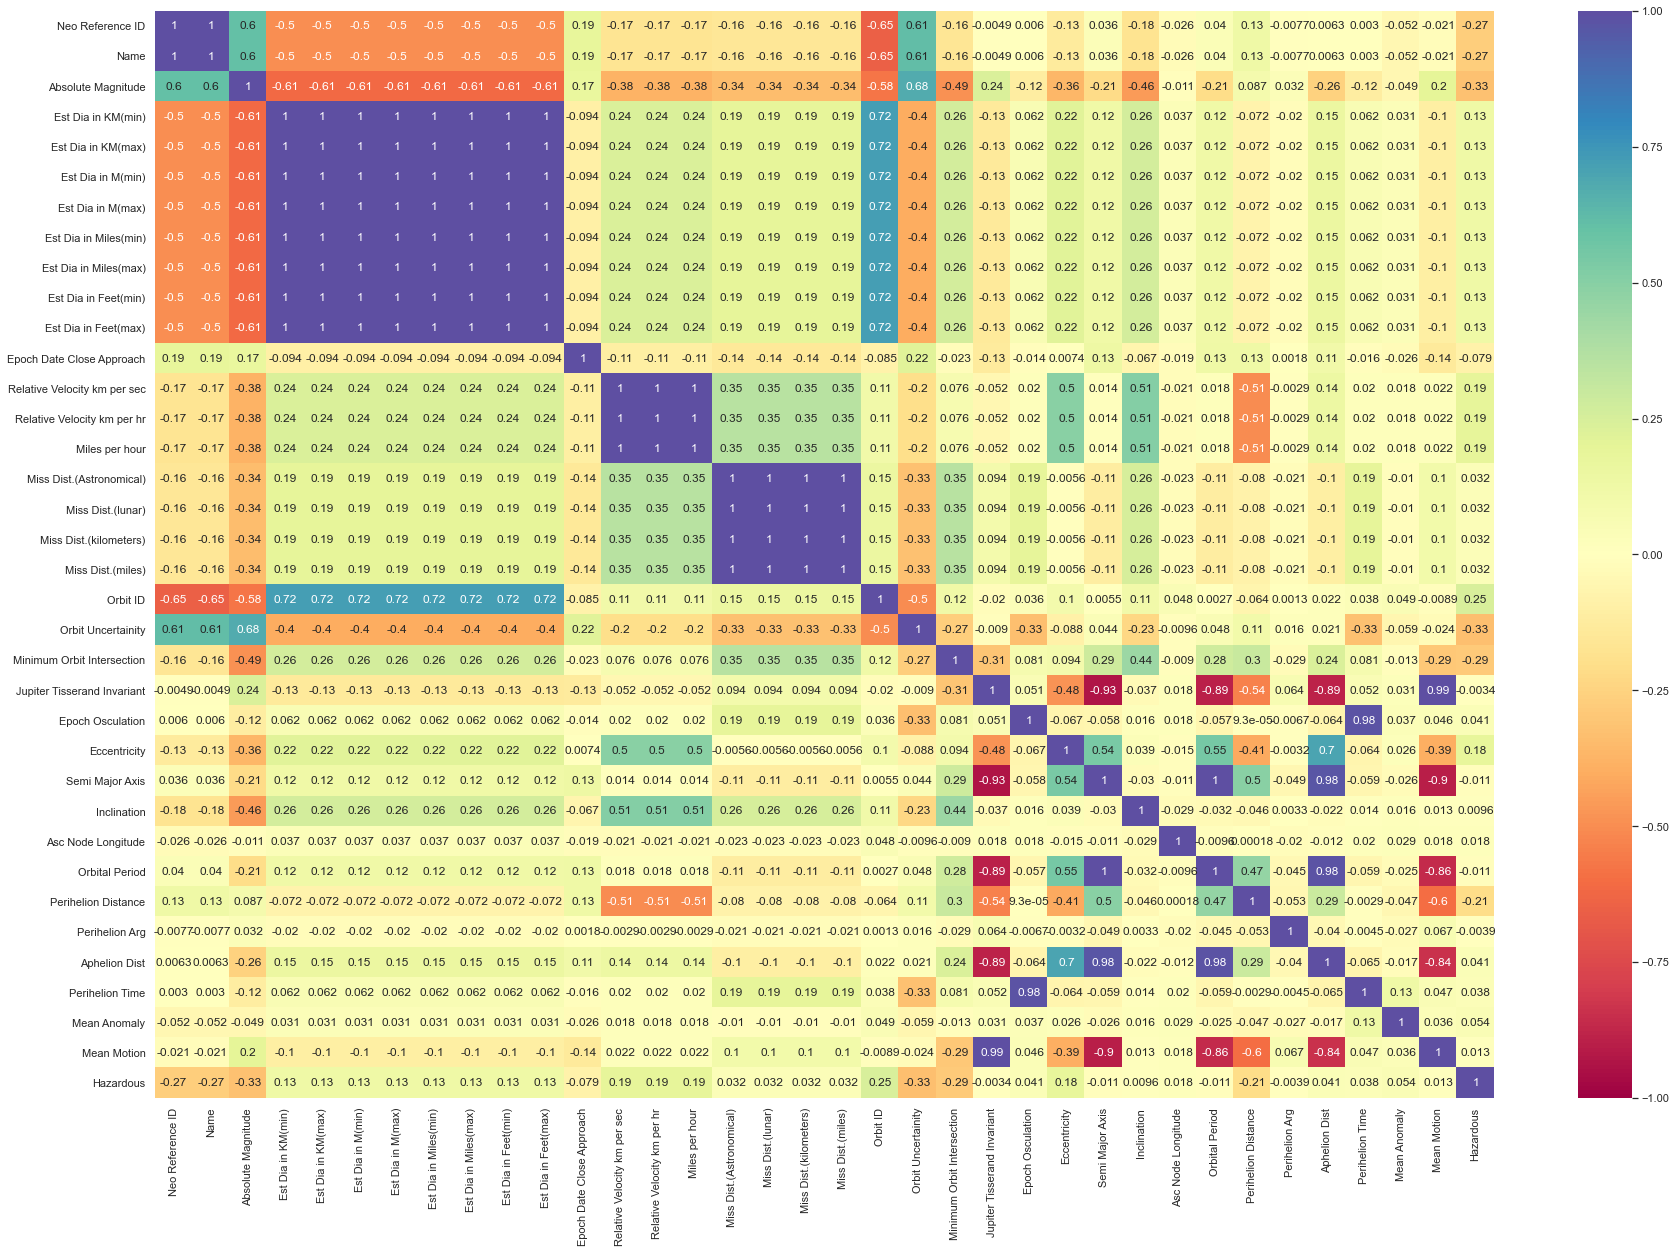

In [12]:
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="Spectral", annot=True)
plt.show()
plt.close()

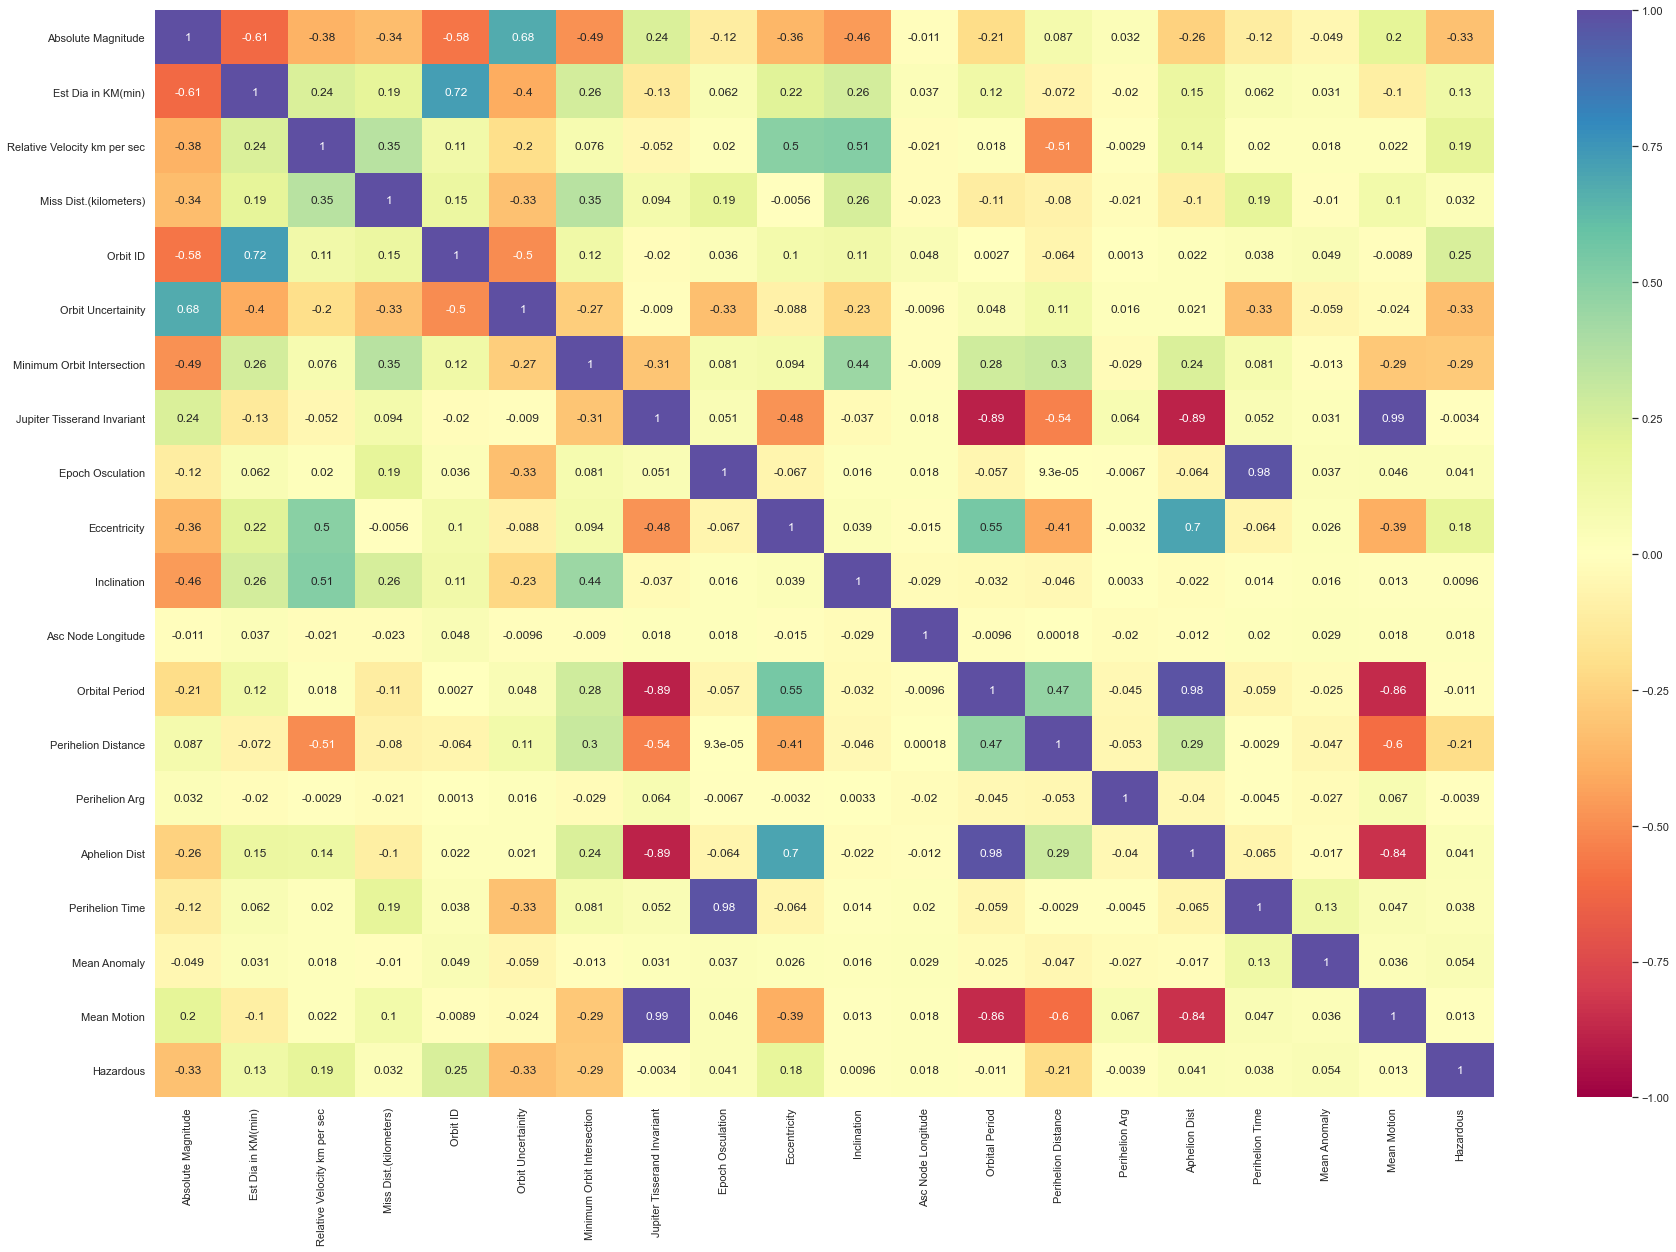

In [13]:
# Usuniecie całkowicie skorelowanych cech
df = df.drop(['Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Est Dia in KM(max)',
              'Relative Velocity km per hr', 'Miles per hour',
              'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)',
              'Semi Major Axis',
              'Neo Reference ID', 'Name',
              'Close Approach Date', 'Epoch Date Close Approach', 'Orbit Determination Date'],axis=1)

# Wykres zredukowanych cech
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="Spectral", annot=True)
plt.show()
plt.close()



# 4.Kodowanie cech kategorycznych

In [19]:
l_enc = LabelEncoder()
df['hazardous'] = l_enc.fit_transform(df.Hazardous) 
print('Hazardous == True -> 1')
print('Hazardous == False -> 0\n')

Hazardous == True -> 1
Hazardous == False -> 0



In [20]:
# Sprawdzanie, czy inne cechy kategoryczne wymagają zakodowania
print(df['Orbiting Body'].unique())
print(df['Equinox'].unique())
print('\n')
# Usunięcie
df = df.drop(['Orbiting Body', 'Equinox', 'Hazardous'], axis=1)

# Sprawdzenie
print(df.info())
df.head()



['Earth']
['J2000']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Columns: 207 entries, Absolute Magnitude to Orbit_ID_611
dtypes: float64(17), int64(2), uint8(188)
memory usage: 1.5 MB
None


,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Inclination,...,Orbit_ID_337,Orbit_ID_350,Orbit_ID_358,Orbit_ID_362,Orbit_ID_370,Orbit_ID_386,Orbit_ID_412,Orbit_ID_422,Orbit_ID_453,Orbit_ID_611
0,21.6,0.127220,6.115834,62753692.0,5,0.025282,4.634,2458000.5,0.425549,6.025981,...,0,0,0,0,0,0,0,0,0,0
1,21.3,0.146068,18.113985,57298148.0,3,0.186935,5.457,2458000.5,0.351674,28.412996,...,0,0,0,0,0,0,0,0,0,0
2,20.3,0.231502,7.590711,7622911.5,0,0.043058,4.557,2458000.5,0.348248,4.237961,...,0,0,0,0,0,0,0,0,0,0
3,27.4,0.008801,11.173874,42683616.0,6,0.005512,5.093,2458000.5,0.216578,7.905894,...,0,0,0,0,0,0,0,0,0,0
4,21.6,0.127220,9.840831,61010824.0,1,0.034798,5.154,2458000.5,0.210448,16.793382,...,0,0,0,0,0,0,0,0,0,0


# 5.Train/Test Split

In [ ]:
# Tworzenie etykiety podzielonej na tablice numpy
features = df.drop('hazardous', axis=1).values
label = df.hazardous.values

# Tworzenie test/train split
training_features, test_features, training_label, test_label = train_test_split(features, label,test_size=0.8,stratify=label,random_state=42)

# Dodanie cech etykiet do wykresu
df_graph = df.copy()
feature_names = df_graph.drop('hazardous', axis=1).columns.tolist()
del df_graph

# 6. Modele

# A Logistic Regression

In [ ]:
# Tworzenie pipeline
logreg_pipe = Pipeline([('Scaling', StandardScaler()),
                        ('LogReg', LogisticRegression())])

# Tworzenie hyperparametrów 
logreg_params = {'LogReg__C': np.arange(0, 10, 0.1),
                 'LogReg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 'LogReg__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                 'LogReg__random_state': [42]}

# GrideSearcCV
logreg_grid = GridSearchCV(estimator=logreg_pipe, param_grid=logreg_params,
                           scoring='accuracy', cv=5)
logreg_grid.fit(training_features, training_label)
logreg_opt_param = logreg_grid.best_params_
logreg_best_score = (logreg_grid.best_score_*100).round(2)
logreg_best_est = logreg_grid.best_estimator_

# Score na podstawie danych
logreg_holdout_score = (logreg_grid.score(test_features, test_label)*100).round(2)

print('Optimal Hyperparameters:')
print(logreg_opt_param)
print('Optimal Estimator:')
print(logreg_best_est)
print('\n')
print('Training Accuracy {}'.format(logreg_best_score))
print('Testing Accuracy {}'.format(logreg_holdout_score))

# B Decision Tree


In [ ]:
# Tworzenie hyperparametrów 
dectree_params = {'max_depth': np.arange(0, 20, 1),
                  'criterion': ['gini', 'entropy'],
                  'min_samples_leaf': np.arange(0, 1, 0.05),
                  'random_state': [42]}

# GrideSearcCV
dectree_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=dectree_params,
                            scoring='accuracy', cv=5)
dectree_grid.fit(training_features, training_label)
dectree_opt_param = dectree_grid.best_params_
dectree_best_score = (dectree_grid.best_score_*100).round(2)
dectree_best_est = dectree_grid.best_estimator_
dectree_feat_imp = dectree_best_est.feature_importances_

# Score na podstawie danych
dectree_holdout_score = (dectree_grid.score(test_features, test_label)*100).round(2)

print('Optimal Hyperparameters:')
print(dectree_opt_param)
print('Optimal Estimator:')
print(dectree_best_est)
print('\n')
print('Training Accuracy {}'.format(dectree_best_score))
print('Testing Accuracy {}'.format(dectree_holdout_score))

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})

# Plotting the optimal tree
plt.subplot(1, 2, 1)
plot_tree(dectree_best_est,
          feature_names=feature_names,  
          class_names=['Non-Hazardous [0]', 'Hazardous [1]'],
          filled=True)

# Plotting feature importnace
plt.subplot(1, 2, 2)
plt.barh(feature_names, dectree_feat_imp)

plt.show()
plt.close

# C Random Forest

In [ ]:
# Tworzenie hyperparametrów
rf_params = {'max_depth': np.arange(0, 20, 1),
             'criterion': ['gini', 'entropy'],
             'min_samples_leaf': np.arange(0, 1, 0.05),
             'random_state': [42],
             'n_estimators': np.arange(0, 10, 1)}

# GrideSearcCV
rf_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_params,
                       scoring='accuracy', cv=5)
rf_grid.fit(training_features, training_label)
rf_opt_param = rf_grid.best_params_
rf_best_score = (rf_grid.best_score_*100).round(2)
rf_best_est = rf_grid.best_estimator_
rf_feat_imp = rf_best_est.feature_importances_

# Score na podstawie danych
rf_holdout_score = (rf_grid.score(test_features, test_label)*100).round(2)

print('Optimal Hyperparameters:')
print(rf_opt_param)
print('Optimal Estimator:')
print(rf_best_est)
print('\n')
print('Training Accuracy {}'.format(rf_best_score))
print('Testing Accuracy {}'.format(rf_holdout_score))

In [ ]:
# Wykres 
plt.barh(feature_names, rf_feat_imp)
plt.show()
plt.close